## 3. Exploratory Data Analysis  
### 3.1 Imports & loading Data  

### 3.2 Explore & analyze the data  
      a. Features scanning & processing  
      b. Features evaluation  
      c. Analyzing & Visualization  
      d. PCA tranformation  
   
### 3.3 Conclusion & summary

### 3.1 imports & loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import matplotlib.dates as mdates
import datetime
import math
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:18: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:19: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`


In [2]:
mass_shooting = pd.read_csv('../data/Clean_data/MassShooting2009_2018_final.csv',index_col='date')

### 3.2 Exploring data
#### a. Features scanning & processing

In [122]:
mass_shooting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2009-03-10 to 2018-11-19
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fatalities                      244 non-null    int64  
 1   injured                         244 non-null    int64  
 2   total_victims                   244 non-null    int64  
 3   policeman_killed                244 non-null    int64  
 4   age                             244 non-null    int64  
 5   employeed(Y/N)                  244 non-null    int64  
 6   employed_at                     244 non-null    object 
 7   mental_health_issues            244 non-null    object 
 8   gender                          244 non-null    object 
 9   year                            244 non-null    int64  
 10  state                           244 non-null    object 
 11  total_licensees                 244 non-null    object 
 12  licensed_business_entitie

#### Features engineering
Type conversion 

In [3]:
mass_shooting['population'] = mass_shooting.population.apply(lambda x: np.int(x.replace(',','')) if type(x) == str else x)
mass_shooting['total_gun_deaths'] = mass_shooting['total_gun_deaths'].apply(lambda x: np.int(x.replace(',','')) if type(x) == str else x)
mass_shooting['total_children_teen_gun_deaths'] = mass_shooting['total_children_teen_gun_deaths'].apply(lambda x: np.int(x.replace(',','')) if type(x) == str else x)
mass_shooting['licensed_business_entities'] = mass_shooting['licensed_business_entities'].apply(lambda x: np.int(x.replace(',','')) if type(x) == str else x)

In [124]:
mass_shooting.head(2)

,fatalities,injured,total_victims,policeman_killed,age,employeed(Y/N),employed_at,mental_health_issues,gender,year,state,total_licensees,licensed_business_entities,population,total_gun_deaths,total_children_teen_gun_deaths,state_population,state_labor_force,unemployment_rate
date,,,,,,,,,,,,,,,,,,,
2009-03-10,10,6,16,0,28,-999,-999,No,Male,2009,Alabama,"115,395",60349,307006550,31347,2811,3621410.0,2162999.0,11.0
2009-03-29,8,2,10,0,45,-999,-999,Yes,Male,2009,North Carolina,"115,395",60349,307006550,31347,2811,7117828.0,4570789.0,10.6


#### Features engineering
Feature extraction

In [4]:
sectors = {'retail': ['Weis grocery','Advance Granite Store'], 'it': ['Yahoo','Virginia TV'],
  'military': ['Fort Hood','Army veteran','former Marine','U.S Army','Military','Navy Yard','former military'],
  'manufacturing': ['manufacturing company','manufacturer Fiamma Inc.','factory'],
  'education': ['University of Alabama'], 'other': '-999',
  'hospitality': ['county health department','some nursing home'],
  'transportation': ['uber','FedEx']}
  
def get_sector(comp):
  for key, val in sectors.items():
    if comp in val:
      comp = key            
  return comp

mass_shooting['sectors'] = mass_shooting['employed_at'].apply(lambda x: get_sector(x))    

In [5]:
null_val = {-999.000000: 0}
mass_shooting['age'].replace(null_val, inplace=True)

In [6]:
age_groups = {'child':[5,16],'young_adult':[16,30],'middle_age_adult':[30,45],
  'old_adult':[45,125],'other':[0,5]}

def age_group(age):
  for key, val in age_groups.items():
    if age in range(val[0],val[-1]):
      age = key            
  return age

mass_shooting['age_group'] = mass_shooting['age'].apply(lambda x: age_group(x))  

In [25]:
mass_shooting['age_group'].unique()

array(['young_adult', 'old_adult', 'middle_age_adult', 'other', 'child'],
      dtype=object)

#### Features engineering
Encoding category variables

In [7]:
gender_code = {'-999': 0,'Male': 1,'Female': 2,'Male and Female':3}
health_code = {'-999': 0,'Yes': 1,'No': 2}
sector_code = {'other':0,'it':1,'military':2,'hospitality':3,'retail':4,'manufacturing':5,
  'education':6,'transportation':7}
age_code = {'other':0,'child':1,'young_adult':2,'middle_age_adult':3,'old_adult':4}

mass_shooting['policeman_killed'].replace(null_val, inplace=True)
mass_shooting['age'].replace(null_val, inplace=True)
mass_shooting['employeed(Y/N)'].replace(null_val, inplace=True)
mass_shooting.gender.replace(gender_code,inplace=True)
mass_shooting['mental_health_issues'].replace(health_code,inplace=True)
mass_shooting.sectors.replace(sector_code,inplace=True)
mass_shooting.age_group.replace(age_code,inplace=True)

#### b. Data quality assessment 

In [33]:
mass_shooting.describe()

,fatalities,injured,total_victims,policeman_killed,age,employeed(Y/N),mental_health_issues,gender,year,licensed_business_entities,population,total_gun_deaths,total_children_teen_gun_deaths,state_population,state_labor_force,unemployment_rate,sectors,age_group
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000,244.000000,2.440000e+02,2.440000e+02,244.000000,244.000000,244.000000
mean,3.930328,6.245902,10.176230,0.118852,14.532787,0.090164,0.704918,0.946721,2014.819672,77285.282787,3.203861e+08,36521.954918,2930.758197,1.012367e+07,6.310475e+06,5.993852,0.299180,1.135246
std,5.846393,34.181267,38.332712,0.564933,18.843599,0.287005,0.813351,0.427007,1.979385,5080.585517,4.408755e+06,2472.757342,280.727587,8.174163e+06,5.099195e+06,1.894937,1.083281,1.417900
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,60349.000000,3.070066e+08,31347.000000,2465.000000,5.380540e+05,3.741260e+05,2.800000,0.000000,0.000000
25%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,77815.000000,3.189074e+08,33636.000000,2711.000000,4.727283e+06,3.075017e+06,4.700000,0.000000,0.000000
50%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,79188.000000,3.208966e+08,36252.000000,2824.000000,7.758751e+06,4.769472e+06,5.500000,0.000000,0.000000
75%,5.000000,4.000000,8.000000,0.000000,29.000000,0.000000,1.000000,1.000000,2016.000000,80119.000000,3.231275e+08,38658.000000,3155.000000,1.564546e+07,9.553634e+06,6.600000,0.000000,2.000000
max,58.000000,527.000000,585.000000,5.000000,70.000000,1.000000,2.000000,3.000000,2018.000000,80493.000000,3.266875e+08,39773.000000,3443.000000,3.098267e+07,1.928082e+07,13.000000,7.000000,4.000000


In [14]:
mass_shooting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2009-03-10 to 2018-11-19
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fatalities                      244 non-null    int64  
 1   injured                         244 non-null    int64  
 2   total_victims                   244 non-null    int64  
 3   policeman_killed                244 non-null    int64  
 4   age                             244 non-null    int64  
 5   employeed(Y/N)                  244 non-null    int64  
 6   employed_at                     244 non-null    object 
 7   mental_health_issues            244 non-null    int64  
 8   gender                          244 non-null    int64  
 9   year                            244 non-null    int64  
 10  state                           244 non-null    object 
 11  total_licensees                 244 non-null    object 
 12  licensed_business_entitie

#### c. Analyzing & Visualization  
- Tagert (y): total_victims  
- Features (Xi): population, state_population, age, gender, total_licensees, unemployment_rate, employees, mental_health_issues

In [8]:
mass_shooting['date'] = pd.to_datetime(mass_shooting.index)

In [9]:
mass_shooting['total_victims_log'] =  np.log10(mass_shooting['total_victims'])

In [10]:
df = mass_shooting.drop(['date','fatalities', 'injured','policeman_killed',
  'total_victims_log','employed_at', 'population','state_labor_force','state', 
  'total_licensees ','total_children_teen_gun_deaths','year','age_group'], axis=1)

In [18]:
print(len(df.columns),df.columns)

10 Index(['total_victims', 'age', 'employeed(Y/N)', 'mental_health_issues',
       'gender', 'licensed_business_entities', 'total_gun_deaths',
       'state_population', 'unemployment_rate', 'sectors'],
      dtype='object')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2009-03-10 to 2018-11-19
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_victims               244 non-null    int64  
 1   age                         244 non-null    int64  
 2   employeed(Y/N)              244 non-null    int64  
 3   mental_health_issues        244 non-null    int64  
 4   gender                      244 non-null    int64  
 5   licensed_business_entities  244 non-null    int64  
 6   total_gun_deaths            244 non-null    int64  
 7   state_population            244 non-null    float64
 8   unemployment_rate           244 non-null    float64
 9   sectors                     244 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 21.0+ KB


C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


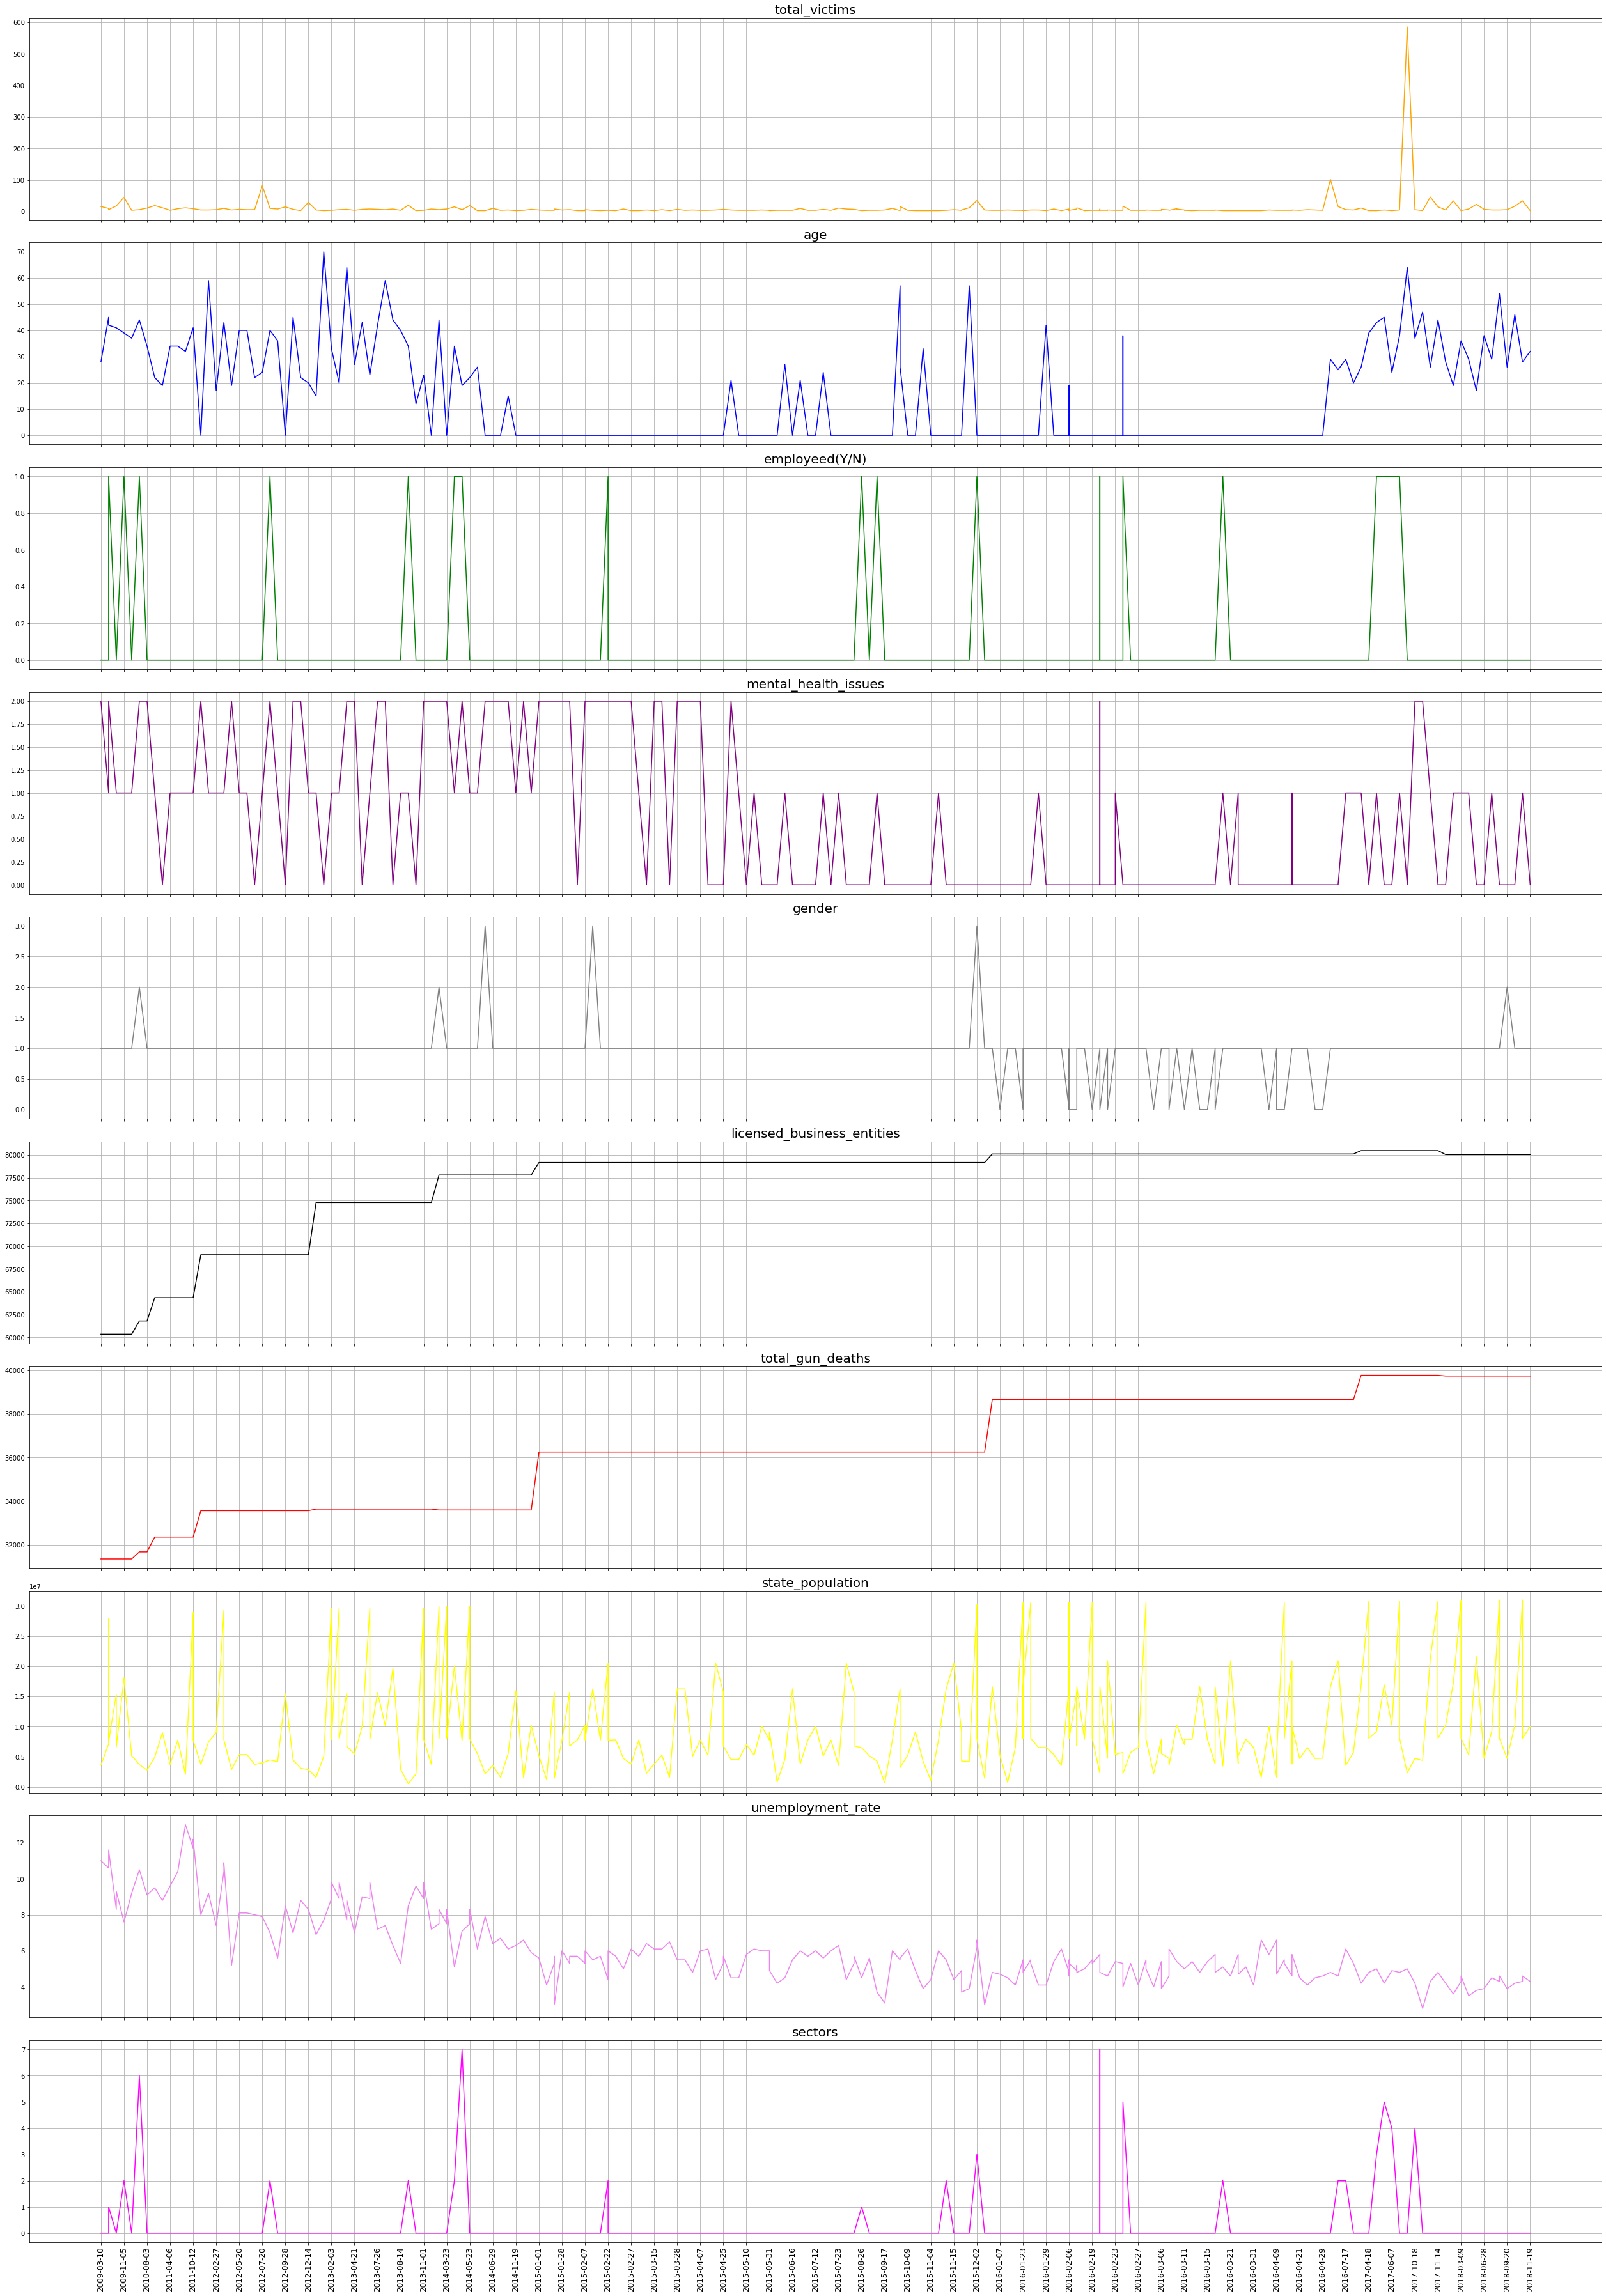

In [37]:
fig, ax = plt.subplots(nrows=len(df.columns), ncols=1, sharex=True, figsize=(35,50))
colors = ['orange', 'blue', 'green', 'purple', 'gray', 'black', 'red','yellow','violet','magenta']

for i, val in enumerate(df.columns):  
  ax[i].plot(df.index, df[val], color=colors[i])   
  ax[i].set_title(val, fontsize=20)
  ax[i].grid(True)

N = 3  # 1 tick every 3
xticks_pos = ax[0].get_xticks()
xticks_labels = ax[0].get_xticklabels()
myticks = [j for i,j in enumerate(xticks_pos) if not i%N]  # index of selected ticks
newlabels = [label for i,label in enumerate(xticks_labels) if not i%N]
plt.gca().set_xticks(myticks)
plt.xticks(fontsize=12, rotation=90)

plt.tight_layout(1.1)
plt.show()

In [38]:
def plot_gb_time_series(df, ts_name, gb_name, value_name, figsize=(20,7), title=None):
    # xtick_locator = mdates.DayLocator(interval=1)
    # xtick_dateformatter = mdates.DateFormatter('%d/%m/%Y')
    fig, ax = plt.subplots(figsize=figsize)
    for key, grp in df.groupby([gb_name]):
        ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name, label=key, marker='o')
    # ax.xaxis.set_major_locator(xtick_locator)
    # ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    ax.legend(loc='upper left')
    _ = plt.xticks(rotation=90, )
    _ = plt.grid()
    _ = plt.xlabel('')
    _ = plt.ylim(0, df[value_name].max() * 1.25)
    _ = plt.ylabel(value_name)
    if title is not None:
        _ = plt.title(title)
    _ = plt.show()

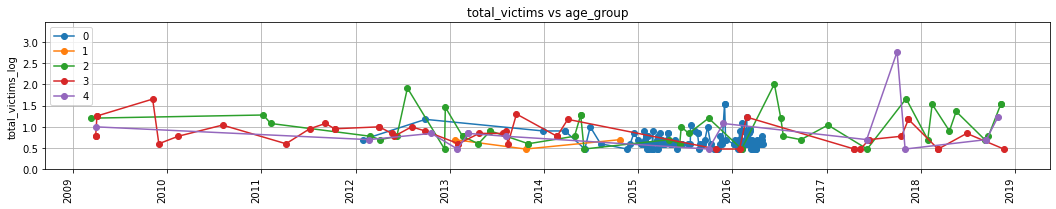

In [39]:
plot_gb_time_series(mass_shooting, 'date', 'age_group', 'total_victims_log',
                    figsize=(18, 3), title='total_victims vs age_group')

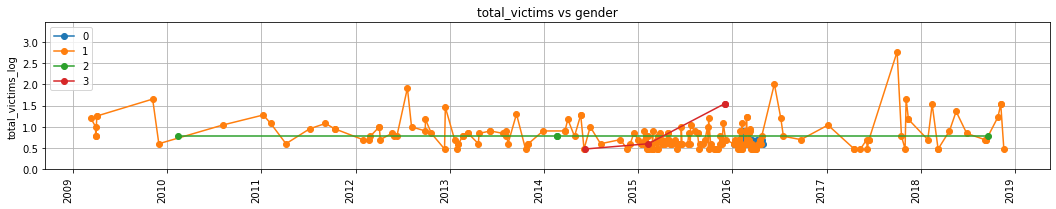

In [129]:
plot_gb_time_series(mass_shooting, 'date', 'gender', 'total_victims_log',
                    figsize=(18, 3), title='total_victims vs gender')

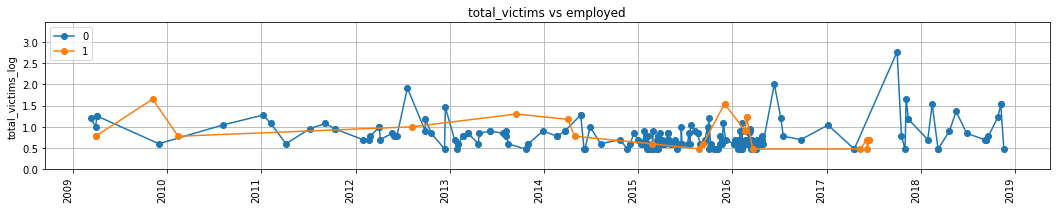

In [128]:
plot_gb_time_series(mass_shooting, 'date', 'employeed(Y/N)', 'total_victims_log',
                    figsize=(18, 3), title='total_victims vs employed')

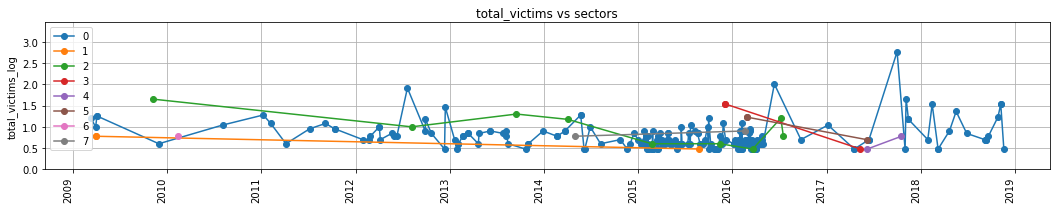

In [127]:
plot_gb_time_series(mass_shooting, 'date', 'sectors', 'total_victims_log',
                    figsize=(18, 3), title='total_victims vs sectors')

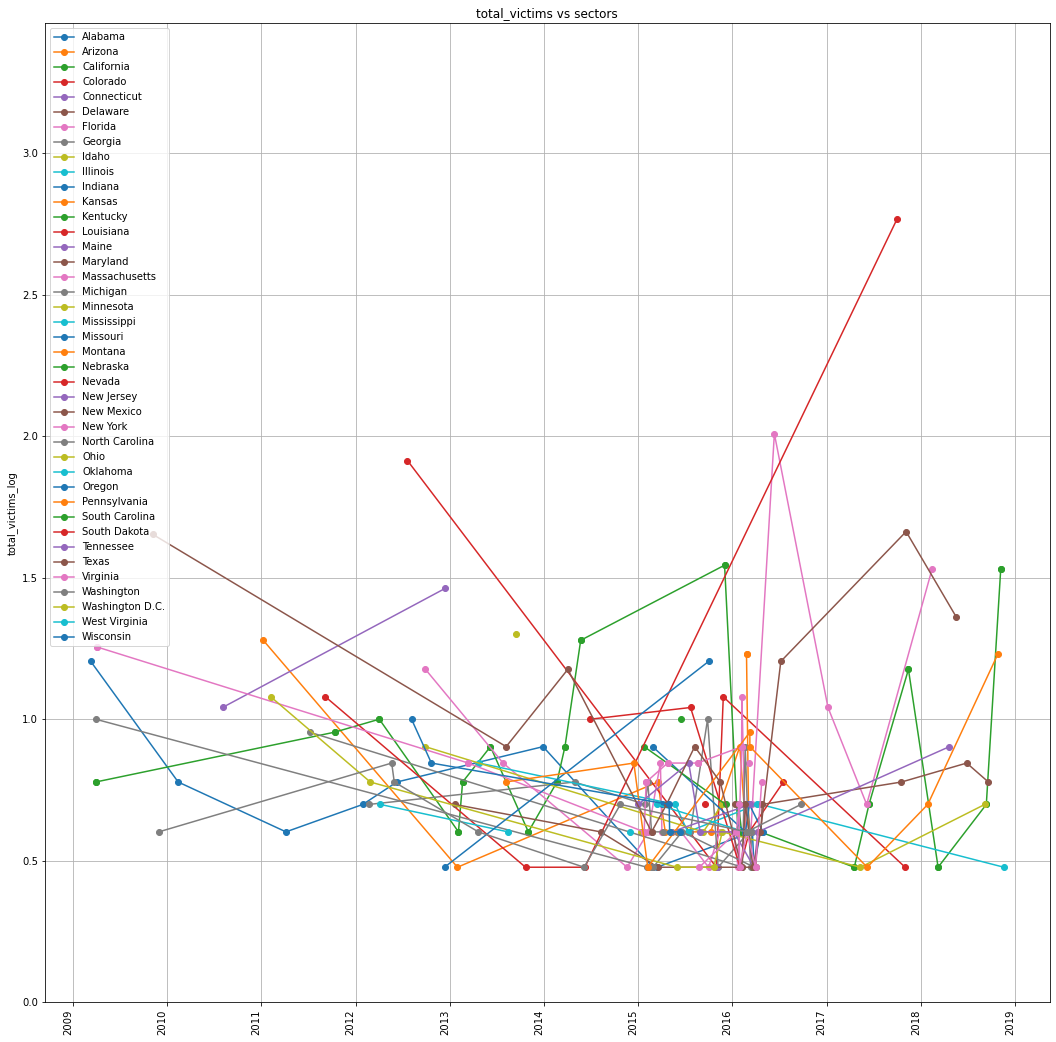

In [134]:
plot_gb_time_series(mass_shooting, 'date', 'state', 'total_victims_log',
                    figsize=(18, 20), title='total_victims vs sectors')

In [135]:
mass_shooting['total_victims'][(mass_shooting.year==2018) & (mass_shooting.state=='Texas')].sum()

23

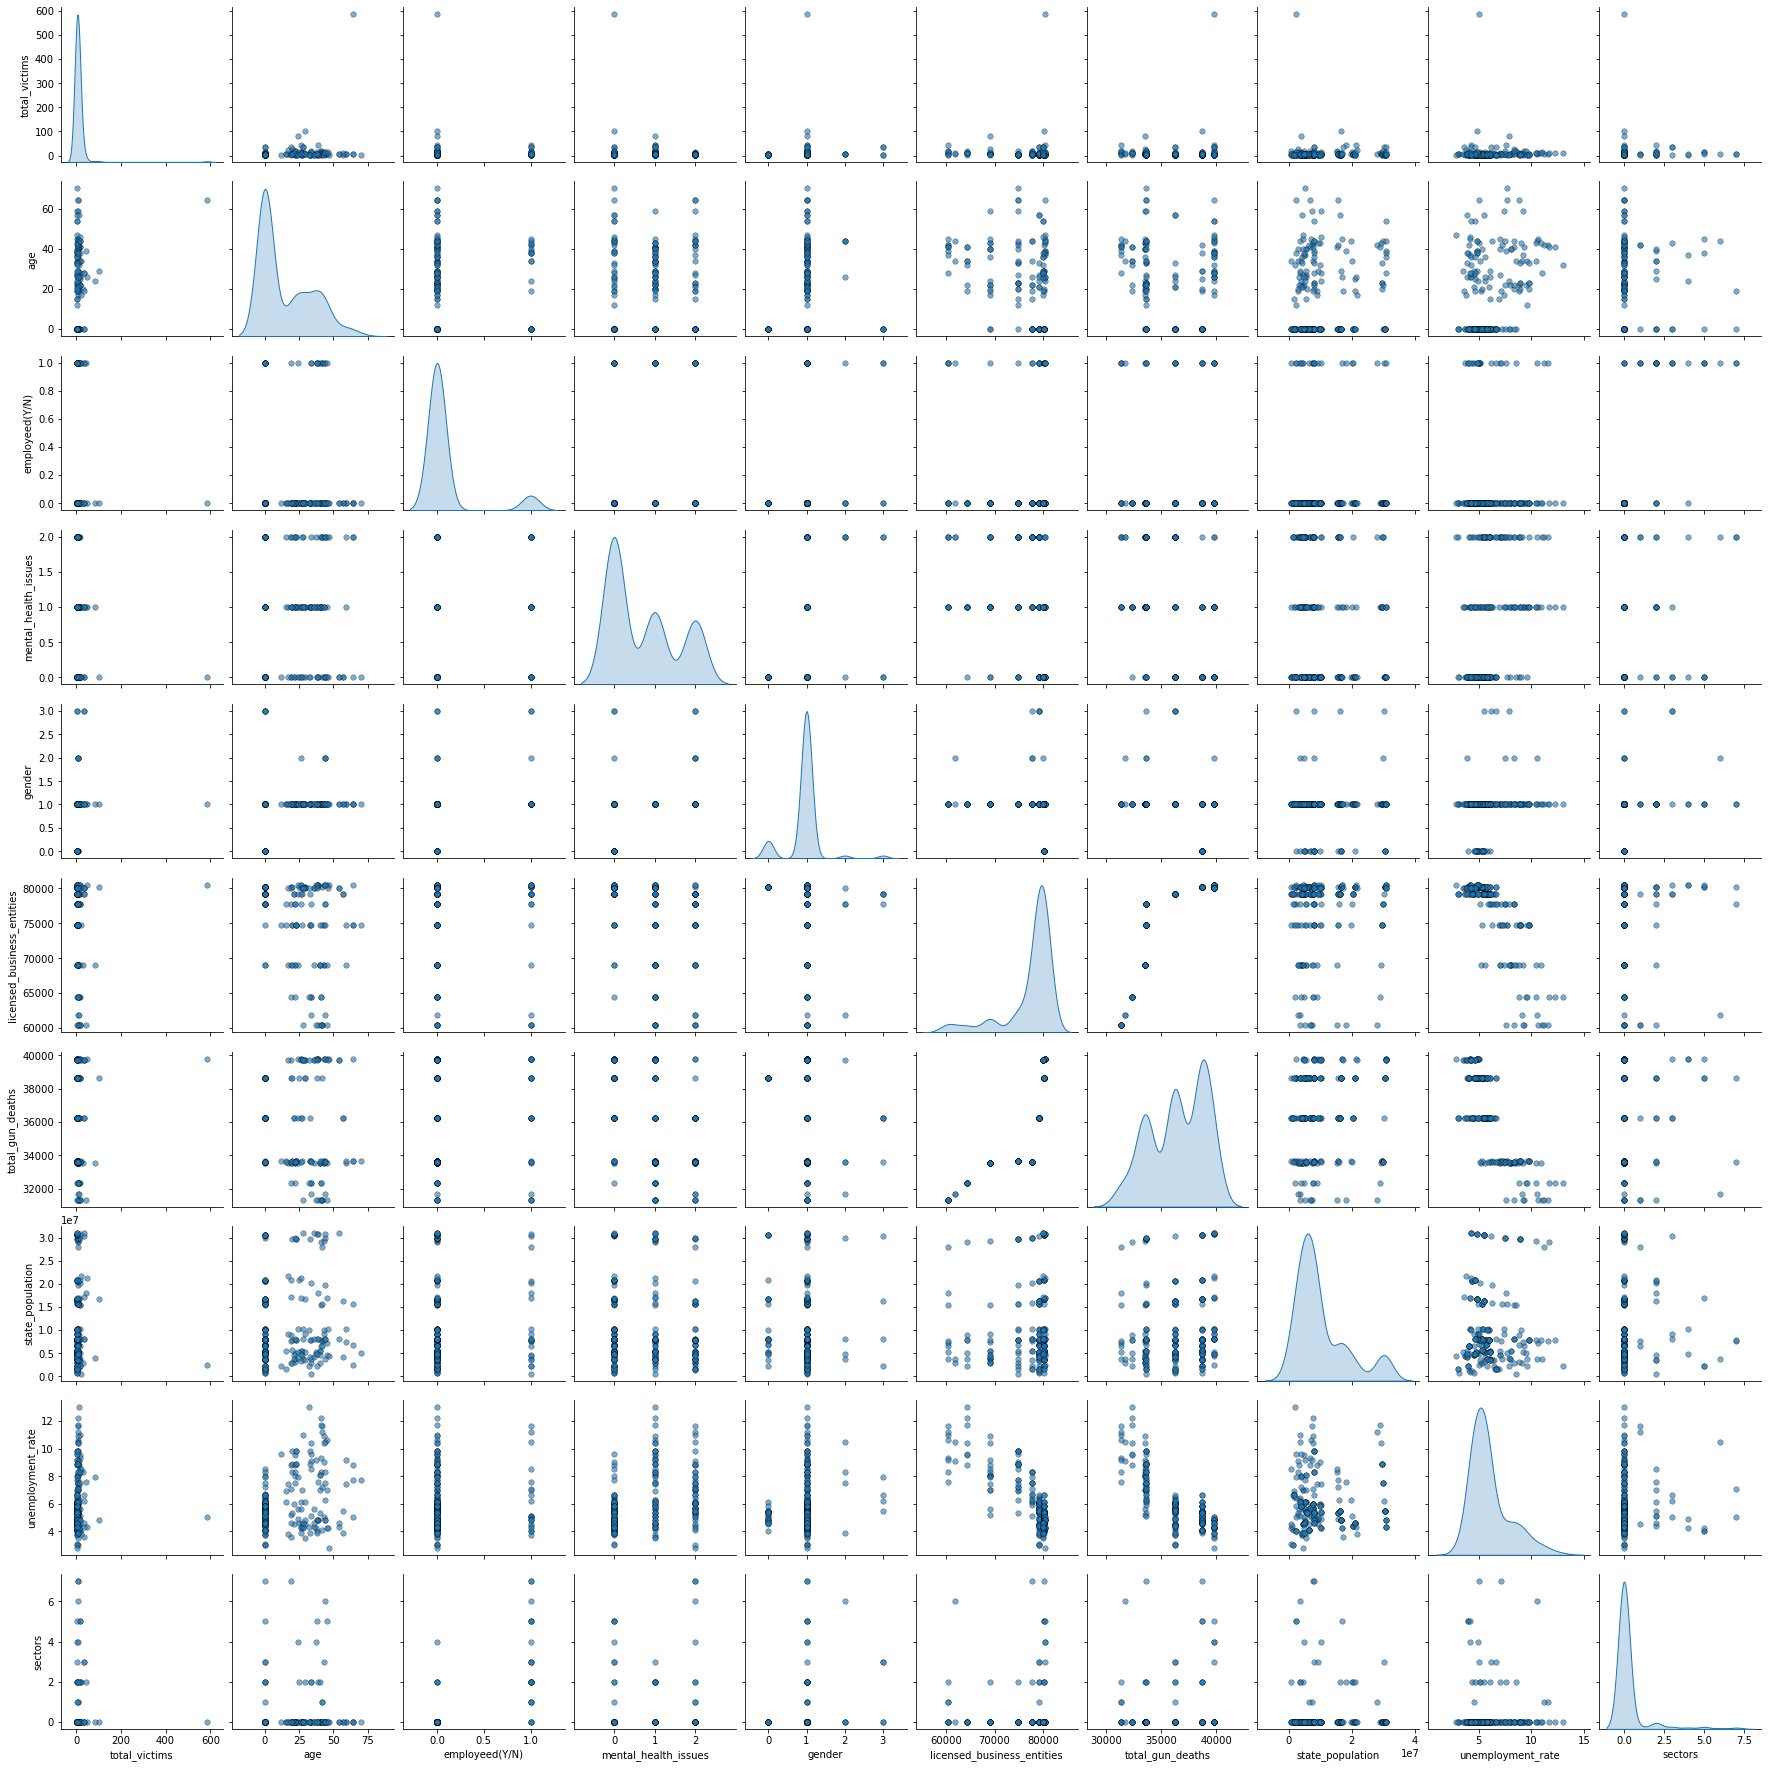

In [27]:
sns.pairplot(df, vars=df.columns, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

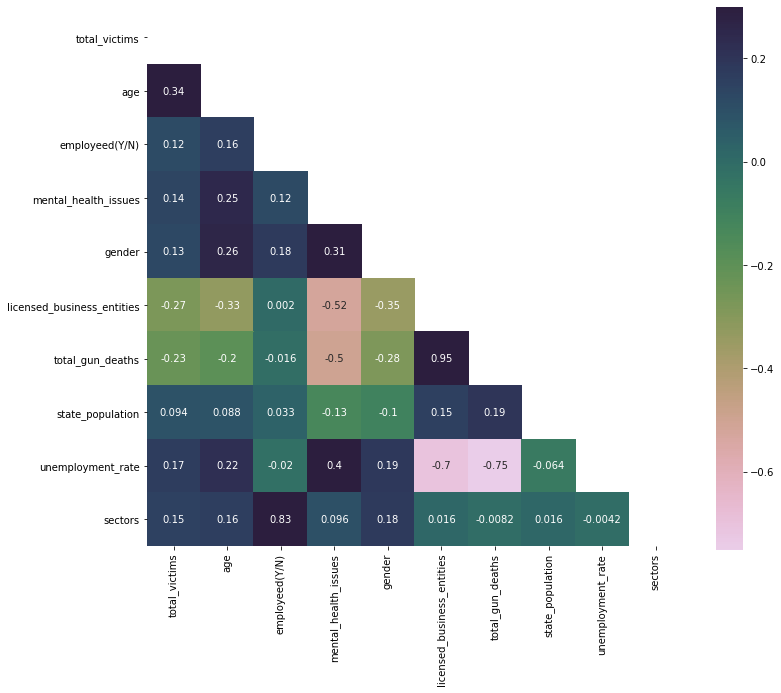

In [28]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method = 'spearman') , annot=True, mask=mask, cmap=cmap, vmax=.3, square=True)

plt.show()

C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


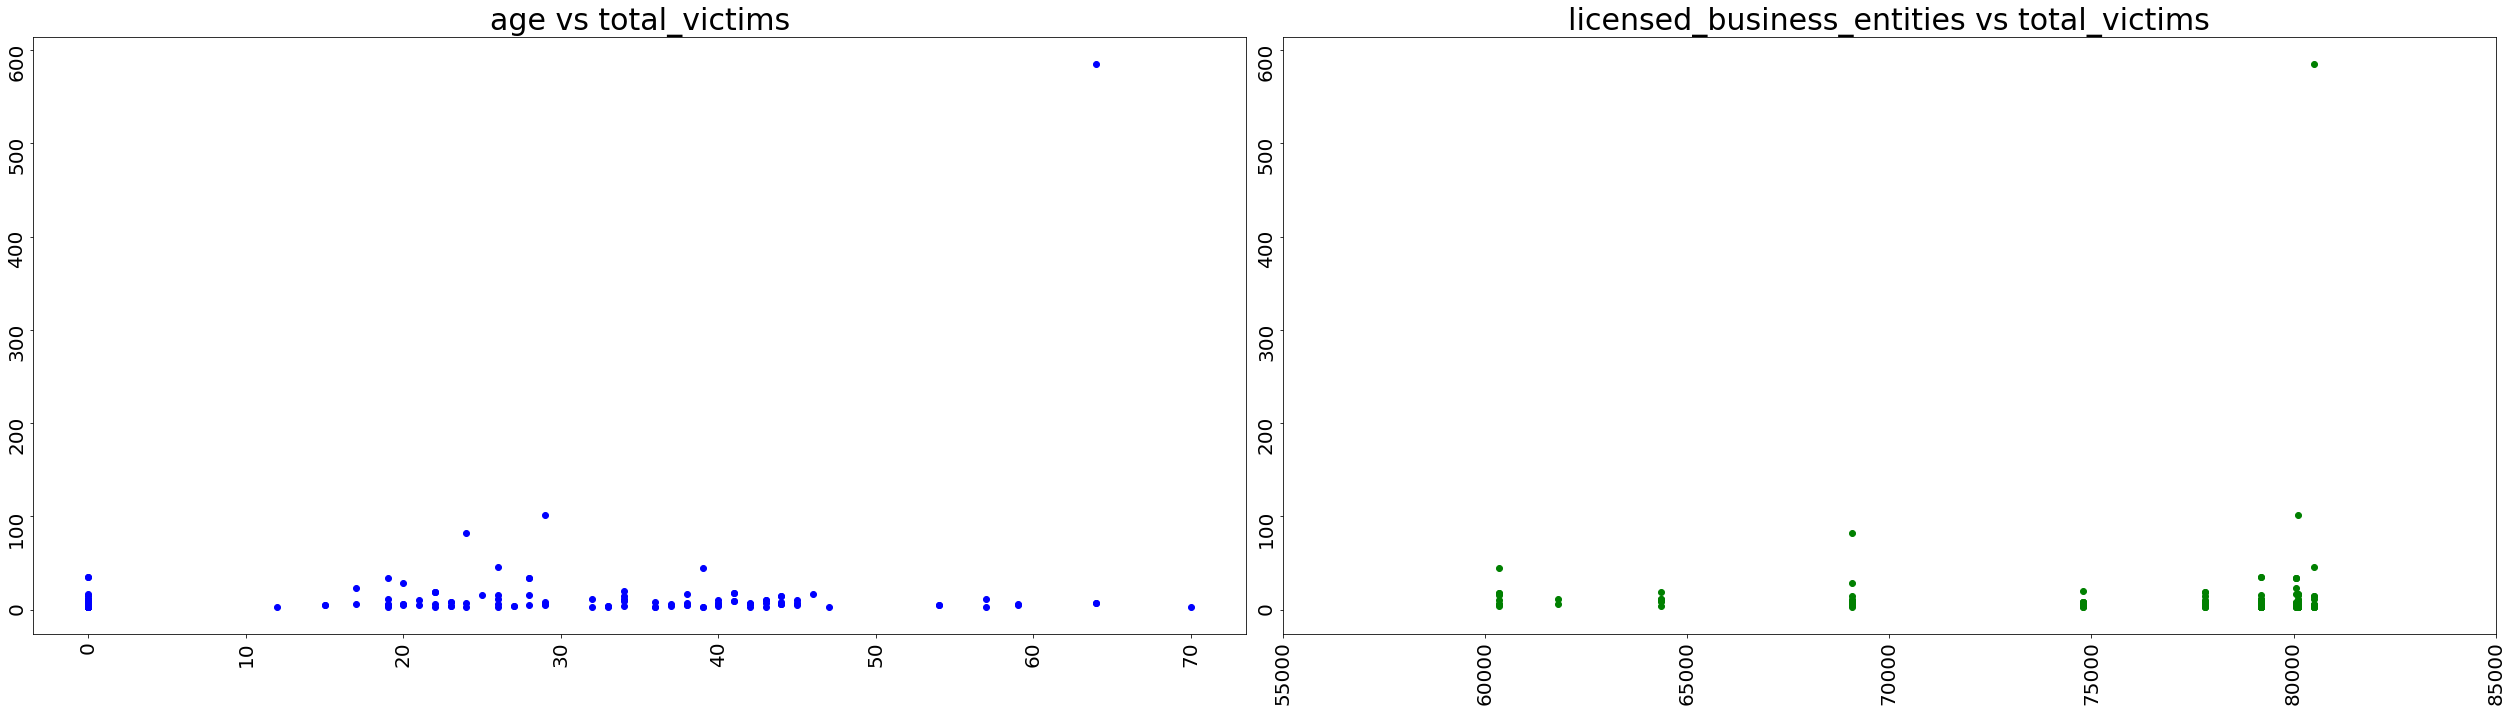

In [68]:
fig, ax = plt.subplots(1, 2, sharey=False, figsize=(35,10))
colors = ['blue', 'green']
cols = ['age','licensed_business_entities','total_victims']

for m in range(len(colors)):
  ax[m].scatter(df[cols[m]], df[cols[-1]], color=colors[m])  
  ax[m].set_title('{} vs {}'.format(cols[m],cols[-1]), fontsize=30)
  plt.sca(ax[m])
  plt.xticks(fontsize=20, rotation=90)
  plt.yticks(fontsize=20, rotation=90)

ax[1].set_xlim(55000,85000)

plt.tight_layout(1.1)
plt.show()

#### d. PCA transformation

#### create features & target sets

In [11]:
features = df.drop('total_victims',axis=1)
target = df['total_victims']

As the heat map above, the **age, licensed_business_entities & unemployment_rate** features are weakly associated with the **total_victims**. Meanwhile there are also associations between licensed_business_entities and the other features (**total_gun_deaths, mental_health_issues**), so it might be worth trying to split the states in a way that accounts for all 10 features.

One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).

We'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

The cumulative variance of the 6 principal components is 0.96392


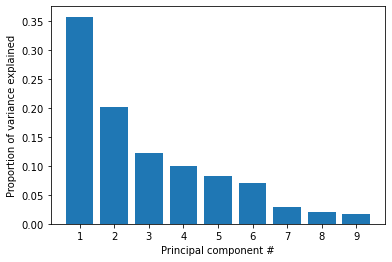

In [12]:
# Scale features
features_scaled = StandardScaler().fit_transform(features)

pca = PCA()
# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(1,10))

# Compute the cumulative proportion of variance explained by the 6 principal components
six_comp_var_exp = 0
for i in range(pca.n_components_ - 2):
    six_comp_var_exp += pca.explained_variance_ratio_[i].cumsum()[0]
print("The cumulative variance of the 6 principal components is {}".format(
    np.round(six_comp_var_exp, 5)))

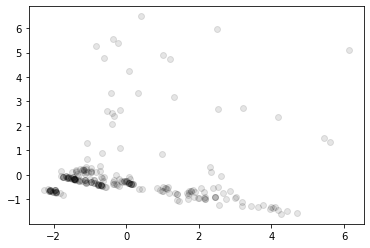

In [13]:
# Transform the scaled features using 6 principal components
pca = PCA(n_components=6)
p_comps = pca.fit_transform(features_scaled)

df_pcomps = pd.DataFrame(p_comps)

# Plot the first two principal components in a scatter plot
plt.scatter(df_pcomps[0],df_pcomps[1],alpha=0.1,color='black')

Define optimum number of cluseters for KMean clustering approach using both PCA output & scaled feature

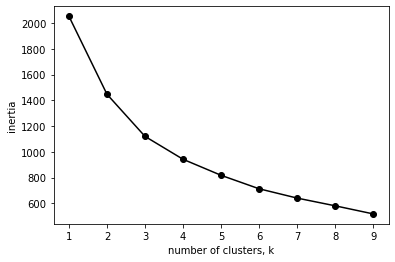

In [14]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_pcomps.iloc[:,:6])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

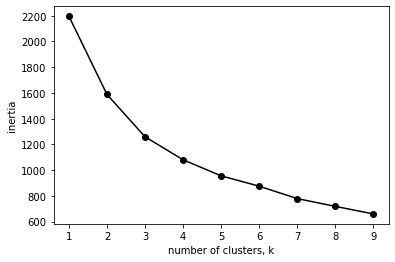

In [15]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(features_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Optimum cluster number is 4 on PCA dataset

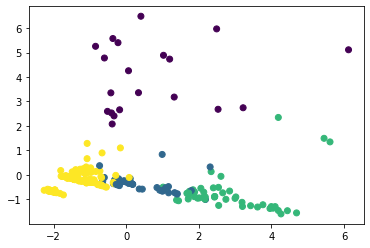

In [16]:
# Create a KMeans object with 4 clusters, use random_state=8 
model = KMeans(n_clusters=4, random_state=8)

# Fit the data to the `km` object
model.fit(df_pcomps.iloc[:,:6])

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(df_pcomps[0], df_pcomps[1], c=model.labels_)

In [21]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    df_pcomps,
    labels=labels,
    dimensions=range(6),
    color=model.labels_
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

In [20]:
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Number of components:"),
    dcc.Slider(
        id='slider',
        min=2, max=6, value=3,
        marks={i: str(i) for i in range(2,7)})
])

@app.callback(
    Output("graph", "figure"), 
    [Input("slider", "value")])
def run_and_plot(n_components):

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(features_scaled)

    var = pca.explained_variance_ratio_.sum() * 100

    labels = {str(i): f"PC {i+1}" 
              for i in range(n_components)}
    labels['color'] = 'Median Price'

    fig = px.scatter_matrix(
        components,
        color=model.labels_,
        dimensions=range(n_components),
        labels=labels,
        title=f'Total Explained Variance: {var:.2f}%')
    fig.update_traces(diagonal_visible=False)
    return fig

app.run_server(host='0.0.0.0', port=8050,debug=False)

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [17]:
df['cluster'] = model.labels_

In [23]:
df.head(2)

,total_victims,age,employeed(Y/N),mental_health_issues,gender,licensed_business_entities,total_gun_deaths,state_population,unemployment_rate,sectors,cluster
date,,,,,,,,,,,
2009-03-10,16,28,0,2,1,60349,31347,3621410.0,11.0,0,2
2009-03-29,10,45,0,1,1,60349,31347,7117828.0,10.6,0,2


In [30]:
ft_scaled = pd.DataFrame(features_scaled,index=features.index,columns=features.columns)
ft_scaled.head(2)

,age,employeed(Y/N),mental_health_issues,gender,licensed_business_entities,total_gun_deaths,state_population,unemployment_rate,sectors
date,,,,,,,,,
2009-03-10,0.716153,-0.3148,1.595553,0.125029,-3.340382,-2.097089,-0.797100,2.647285,-0.276748
2009-03-29,1.620170,-0.3148,0.363544,0.125029,-3.340382,-2.097089,-0.368481,2.435762,-0.276748


In [31]:
ft_scaled['cluster'] = model.labels_

A reasonable next step in our analysis is to explore how the three clusters are different in terms of the three features that we used for clustering. Instead of using the scaled features, we return to using the unscaled features to help us interpret the differences.

C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


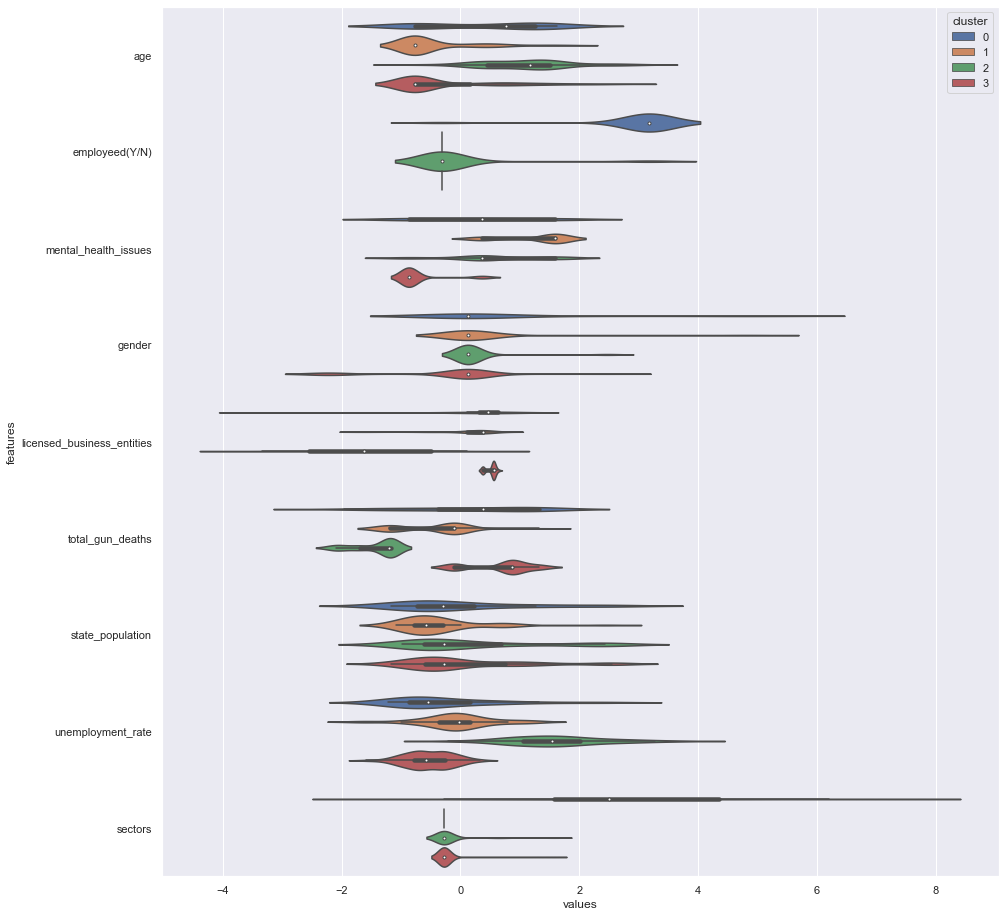

In [46]:
# Reshape the DataFrame to the long format
ft_melt = pd.melt(ft_scaled, id_vars=['cluster'],
    var_name='features', value_name='values',
    value_vars=['age','employeed(Y/N)','mental_health_issues','gender','licensed_business_entities',
    'total_gun_deaths','state_population','unemployment_rate','sectors'])

# Create a violin plot splitting and coloring the results according to the km-clusters
plt.figure(figsize=(15,16))
ax = sns.violinplot(ft_melt['values'],ft_melt['features'],hue=ft_melt['cluster'])

,count,mean,sum
cluster,,,
0,20,10.500000,210
1,48,5.291667,254
2,48,10.937500,525
3,128,11.671875,1494


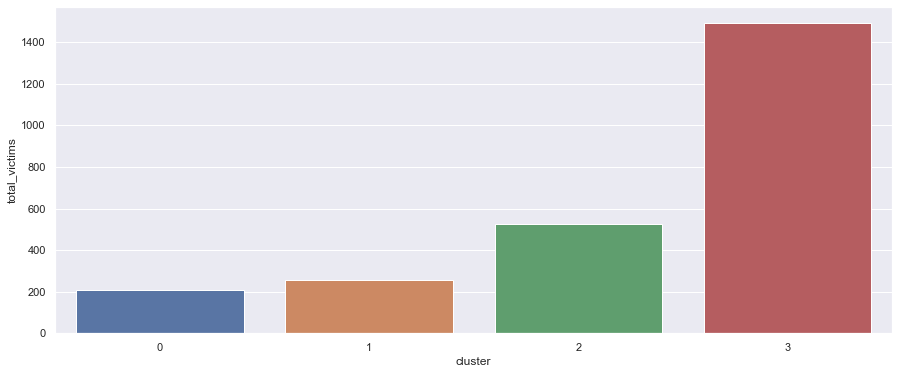

In [48]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='cluster', y='total_victims', data=df, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'total_victims' mean and sum.
count_mean_sum = df.groupby('cluster')['total_victims'].agg(['count', 'mean', 'sum'])
count_mean_sum

In [49]:
mass_shooting['cluster'] = model.labels_

In [61]:
state_00 = mass_shooting.state[mass_shooting.cluster == 0].unique()
state_01 = mass_shooting.state[mass_shooting.cluster == 1].unique()
state_02 = mass_shooting.state[mass_shooting.cluster == 2].unique()
state_03 = mass_shooting.state[mass_shooting.cluster == 3].unique()

In [62]:
for i in state_03:
  if i in state_00:
    state_00.remove(i)
  if i in state_01:
    state_01.remove(i)
  if i in state_02:
    state_02.remove(i)
print(len(state_03),np.sort(state_03),'\n',len(state_02),np.sort(state_02),'\n',len(state_01),np.sort(state_01))

1 [['Alabama' 'Arizona' 'California' 'Colorado' 'Delaware' 'Florida'
  'Georgia' 'Illinois' 'Kansas' 'Louisiana' 'Maine' 'Maryland'
  'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri'
  'Montana' 'Nebraska' 'Nevada' 'New Jersey' 'New Mexico' 'New York'
  'North Carolina' 'Ohio' 'Oregon' 'Pennsylvania' 'South Carolina'
  'South Dakota' 'Tennessee' 'Texas' 'Virginia' 'Washington']] 
 1 [['Alabama' 'Arizona' 'California' 'Colorado' 'Connecticut' 'Florida'
  'Georgia' 'Illinois' 'Michigan' 'Minnesota' 'Nevada' 'New York'
  'North Carolina' 'Ohio' 'Oregon' 'Pennsylvania' 'Texas' 'Washington'
  'Wisconsin']] 
 1 [['Alabama' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia' 'Idaho'
  'Indiana' 'Louisiana' 'Missouri' 'Nebraska' 'Nevada' 'New Mexico'
  'New York' 'North Carolina' 'Oklahoma' 'Pennsylvania' 'Tennessee'
  'Washington' 'West Virginia' 'Wisconsin']]


C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


### 3.3 Conclusion & summary

Total victims target feature doesnt show clear linear relationships to other features of which the linear regression and other regression approach are not so efficient for this case. Unsuppervise clustering is expected to be able to extract patterns from this data set